Importacion de Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   


In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Cargar datos
df = pd.read_csv("heart-disease.csv")

# Exploración inicial
print("Forma del dataset:", df.shape)
print("\nPrimeras filas:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())

# Ajustar el nombre de la columna objetivo
target_col = "target" if "target" in df.columns else df.columns[-1]

X = df.drop(columns=[target_col])
y = df[target_col]

# División del dataset con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Crear y entrenar el modelo
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Resultados
print("\n" + "="*50)
print("RESULTADOS DEL MODELO")
print("="*50)
print(f"\nAccuracy en conjunto de prueba: {accuracy_score(y_test, y_pred):.4f}")
print(f"\nValidación cruzada (5-fold):")
print(f"  - Scores: {cv_scores}")
print(f"  - Media: {cv_scores.mean():.4f}")
print(f"  - Desviación estándar: {cv_scores.std():.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Forma del dataset: (303, 14)

Primeras filas:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   tres

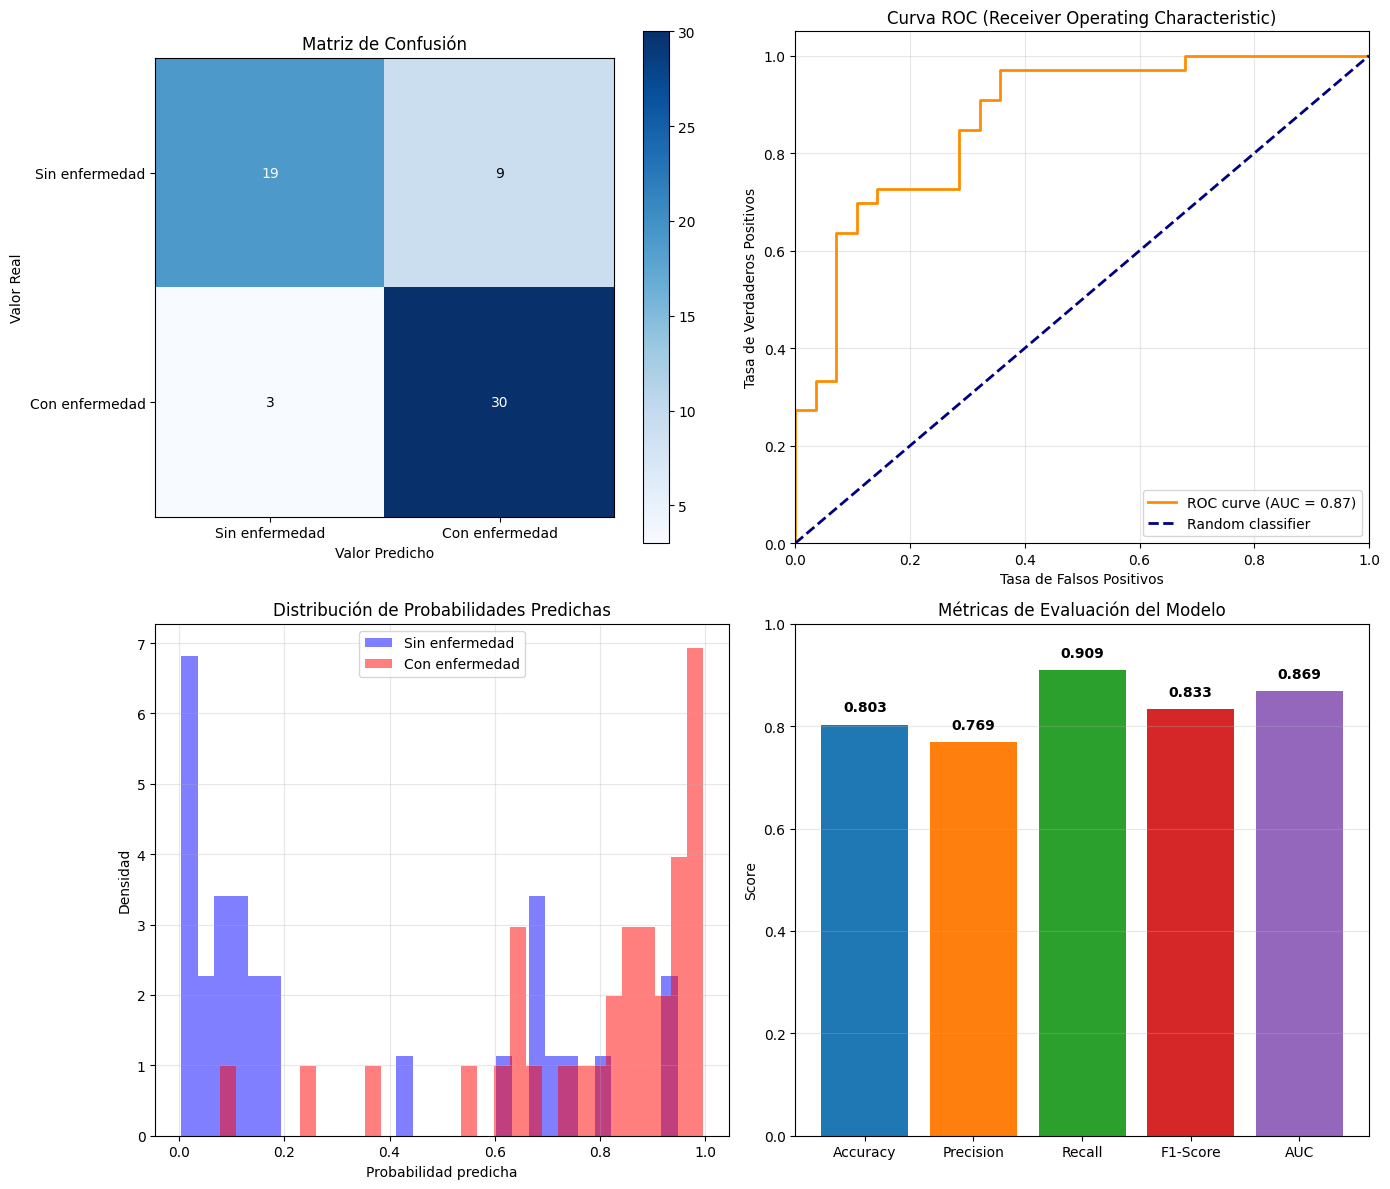


Métricas detalladas:
  Accuracy: 0.8033
  Precision: 0.7692
  Recall: 0.9091
  F1-Score: 0.8333
  AUC: 0.8690


In [3]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Matriz de Confusión
ax1 = axes[0, 0]
im = ax1.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax1.figure.colorbar(im, ax=ax1)
ax1.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=['Sin enfermedad', 'Con enfermedad'],
        yticklabels=['Sin enfermedad', 'Con enfermedad'],
        title='Matriz de Confusión',
        ylabel='Valor Real',
        xlabel='Valor Predicho')

# Añadir valores en cada celda
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax1.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# 2. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

ax2 = axes[0, 1]
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Tasa de Falsos Positivos')
ax2.set_ylabel('Tasa de Verdaderos Positivos')
ax2.set_title('Curva ROC (Receiver Operating Characteristic)')
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

# 3. Distribución de predicciones
ax3 = axes[1, 0]
ax3.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.5, label='Sin enfermedad', color='blue', density=True)
ax3.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.5, label='Con enfermedad', color='red', density=True)
ax3.set_xlabel('Probabilidad predicha')
ax3.set_ylabel('Densidad')
ax3.set_title('Distribución de Probabilidades Predichas')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Comparación de métricas
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'AUC': roc_auc
}

ax4 = axes[1, 1]
bars = ax4.bar(metrics.keys(), metrics.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
ax4.set_ylim([0, 1])
ax4.set_ylabel('Score')
ax4.set_title('Métricas de Evaluación del Modelo')
ax4.grid(True, axis='y', alpha=0.3)

# Añadir valores en las barras
for i, (key, value) in enumerate(metrics.items()):
    ax4.text(i, value + 0.02, f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nMétricas detalladas:")
for metric, value in metrics.items():
    print(f"  {metric}: {value:.4f}")

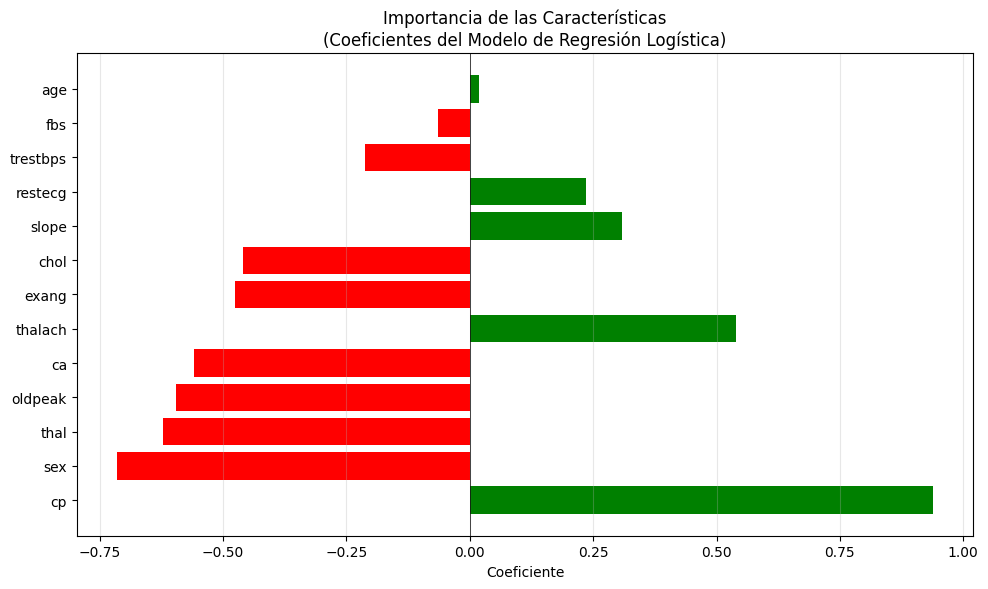


Top 5 características más importantes:
    Feature  Coefficient
2        cp     0.937735
1       sex    -0.714030
12     thal    -0.621578
9   oldpeak    -0.594819
11       ca    -0.559203


In [4]:
# Análisis de características importantes (coeficientes del modelo)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.named_steps['logisticregression'].coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
plt.xlabel('Coeficiente')
plt.title('Importancia de las Características\n(Coeficientes del Modelo de Regresión Logística)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 5 características más importantes:")
print(feature_importance.head())